In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import pandas as pd
from IPython import display

In [2]:
df = pd.read_csv("output.csv", header=None)

In [3]:
psiT = df.iloc[2:]
len(psiT)

100

In [4]:
arraySize = np.asarray(df.iloc[0,1:]).shape
axis_len = int(np.sqrt(arraySize[0]))
shape = (axis_len, axis_len)
shape

(101, 101)

In [5]:
x = np.linspace(0, 10, axis_len)
y = np.linspace(0, 10, axis_len)

x, y = np.meshgrid(x, y)
x.shape

(101, 101)

In [6]:
df.iloc[1,0]

'Psi-0'

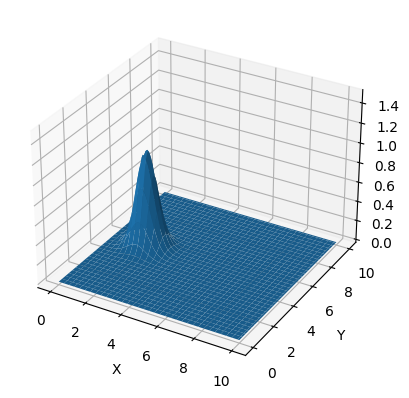

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, np.asarray(df.iloc[1,1:]).reshape(shape))
#ax.plot_surface(x, y, np.asarray(df.iloc[1,1:]).reshape(shape))
ax.set_zlim(zmax=1.5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [8]:
psi0 = np.asarray(df.iloc[1,1:], dtype=float)
psi0 = psi0.reshape(shape)
type(psi0)

numpy.ndarray

In [9]:
colors = [(1,1,1,c) for c in np.linspace(0, 1, 100)]
cmap_pot = mcolors.LinearSegmentedColormap.from_list("cmap_pot", colors, N=5)

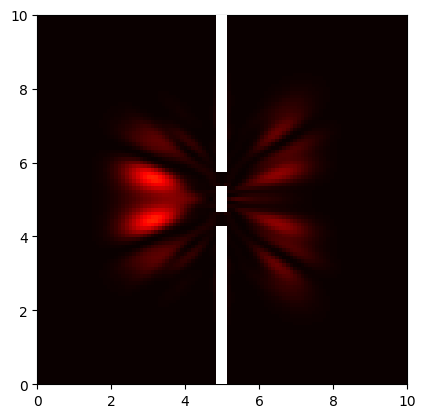

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(0, 10), ylim=(0, 10))

ax.imshow(np.asarray(df.iloc[0,1:], dtype=float).reshape(shape),
          extent=[0,10,0,10],
          cmap=cmap_pot,
          vmin=1, vmax=200,
          zorder=50,
          interpolation="none")


img  = ax.imshow(np.asarray(df.iloc[1,1:], dtype=float).reshape(shape),
          extent=[0, 10, 0, 10],
          cmap=plt.get_cmap("hot"),
          vmin=float(psi0.min()), vmax=float(psi0.max()),
          zorder=1,
          interpolation="none")

def animate(i):
    img.set_data(np.asarray(psiT.iloc[i,1:], dtype=float).reshape(shape))
    img.set_zorder(1)

anim = animation.FuncAnimation(fig, animate, interval=1, frames=np.arange(0, len(psiT), 2), repeat=False, blit=0)

writer = animation.PillowWriter(fps=60)
anim.save("DS_RungeKutta.gif", writer=writer)


plt.show()